In [1]:
#Reference
import numpy as np
import scipy as sp
from scipy.spatial import KDTree
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import math

import os
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Sampling from Guassian => Find P(0) (using KDE); The Model of 0 Vector
#d==dimension
d=2
mean = np.ones(d)

#Define Gaussian Class
class Gaussian:
    def __init__(self, covmat=(0.1)*np.diag(v=np.ones(len(mean)), k=0)):
        self.covmat = covmat        
    def evaluate(self, x, mean):
        cov = self.covmat
        inv_cov = np.linalg.inv(cov)
        if (np.linalg.det(2*np.pi*cov))**(-0.5) >= 0.0:
            return((2*np.pi*(np.linalg.det(cov)))**(-0.5)*np.exp((-0.5)*(x-mean)@inv_cov@(x-mean)))
        else:
            print("Determinant of covariance matrix is not positive definite.")

#Sample Points from Gaussian
g = Gaussian()
mean = np.ones(d)
x=np.zeros(len(mean))
covariance = np.diag(v=np.ones(len(mean)), k=0)
samples = np.random.multivariate_normal(mean, covariance, size=1000)
P0 = 0
for m in samples:
    P0 += (1000)**(-1.0)*g.evaluate(x,m)
   
#print(samples)
print(P0)
print(len(mean))  #Check dim

0.14888417583214686
2


[0.12429398 0.         0.         0.         0.         0.
 0.         0.        ]
[0.12429398 0.16974105 0.         0.         0.         0.
 0.         0.        ]
[0.12429398 0.16974105 0.2319641  0.         0.         0.
 0.         0.        ]
[0.12429398 0.16974105 0.2319641  0.1456761  0.         0.
 0.         0.        ]
[0.12429398 0.16974105 0.2319641  0.1456761  0.38958807 0.
 0.         0.        ]
[0.12429398 0.16974105 0.2319641  0.1456761  0.38958807 0.06864708
 0.         0.        ]
[0.12429398 0.16974105 0.2319641  0.1456761  0.38958807 0.06864708
 0.15195412 0.        ]
[0.12429398 0.16974105 0.2319641  0.1456761  0.38958807 0.06864708
 0.15195412 0.15655781]


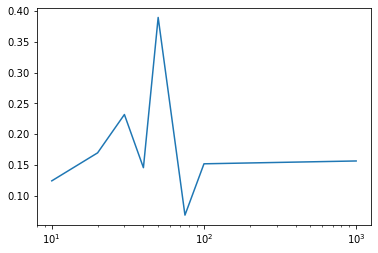

In [3]:
#Generate Random Samples, Used as a check
sample_length = [10, 20, 30, 40, 50, 75, 100, 1000]
pval = np.zeros(len(sample_length))
for i in range(len(sample_length)):
    length = sample_length[i]
    samples = np.random.multivariate_normal(mean, covariance, size=length)
    P=0
    for m in samples:
        P += (length)**(-1.0)*g.evaluate(x,m)
    
    pval[i] = P
    print(pval)

plt.plot(sample_length, pval)
plt.xscale('log')

In [4]:
#KD-Tree Time :O
#From sample lengths, find k+1 nearest neighbors with kdtree, k=100 nearest neighbors
kdtree = KDTree(samples)
query = kdtree.query(x=np.zeros(d), k=100)
#Query KD-Tree for nearest Neighbors
print(query)
index = query[1]
print(index)
data = kdtree.data[index]
#Get data points of the nearest neighbors
print(data)

(array([0.0307626 , 0.05732067, 0.09548381, 0.10984913, 0.13828905,
       0.17126198, 0.19646917, 0.20533187, 0.21453129, 0.22827284,
       0.23345168, 0.23964265, 0.24245741, 0.26606822, 0.27778712,
       0.28051283, 0.2814137 , 0.3149019 , 0.32777135, 0.34407377,
       0.36060958, 0.37329458, 0.3757483 , 0.38126753, 0.38294274,
       0.38765169, 0.39202203, 0.39255587, 0.39641296, 0.39853754,
       0.40124339, 0.40402523, 0.40515813, 0.40633584, 0.42496502,
       0.43466563, 0.44387206, 0.44594156, 0.44619916, 0.44896601,
       0.45516836, 0.45549249, 0.47159644, 0.47503647, 0.47792104,
       0.4786429 , 0.48299196, 0.48561031, 0.48973607, 0.49501295,
       0.49659429, 0.50747959, 0.51262109, 0.51273856, 0.51336586,
       0.51402603, 0.51728043, 0.52178497, 0.524386  , 0.52875393,
       0.5344103 , 0.53701211, 0.54237482, 0.55094995, 0.55570973,
       0.55755518, 0.55992821, 0.56198544, 0.56551532, 0.57126404,
       0.58268057, 0.58968534, 0.60114396, 0.60264424, 0.6036

In [5]:
#Gaussian Around Sampled Points

pvalsamples = np.zeros(len(samples))

#Pick one data point as modelled point, compare every other point to "modelled" point
for i in range(len(samples)):
    modpoint = samples[i]
    modquery = kdtree.query(modpoint, k=100)
    modindex = modquery[1]
    moddata = kdtree.data[modindex]
    print('\r' +str(i),end='')
    Pd = (1/1000)
    for j in range(len(moddata)):
        Pd += (1000)**(-1.0)*g.evaluate(moddata[j], modpoint)
        
    pvalsamples[i] = Pd #Pval of samples 

#print(len(data))
#print(data)

print(pvalsamples)

999[0.25867464 0.18553797 0.19355353 0.19966036 0.180209   0.22416213
 0.03110186 0.19972882 0.12173737 0.12147996 0.15924638 0.1983167
 0.09758109 0.09335207 0.0520899  0.19317929 0.15721823 0.24297638
 0.0860433  0.14479322 0.13744401 0.01116564 0.05691627 0.17724222
 0.08819071 0.07200256 0.21850695 0.1995216  0.2179511  0.03604039
 0.25294013 0.14213259 0.22935454 0.05152198 0.22742249 0.05044338
 0.01723594 0.1704277  0.06423617 0.046954   0.21819384 0.199227
 0.02286604 0.05830203 0.21138076 0.12092617 0.16694653 0.20274427
 0.21594943 0.10573364 0.13385256 0.25199581 0.24492038 0.02826345
 0.15469685 0.22274775 0.07694669 0.01247788 0.08997112 0.15812486
 0.23037568 0.08337367 0.03683908 0.0658353  0.13765521 0.20808954
 0.21004323 0.1896996  0.21283858 0.12811545 0.08188845 0.11097204
 0.01235723 0.25130076 0.24908982 0.06989122 0.2462016  0.08971631
 0.17656673 0.23176103 0.01614625 0.20626446 0.25318426 0.21950615
 0.02911716 0.19676437 0.23274135 0.16833037 0.22683127 0.2525

In [38]:
#Compare Values Pi to P0
#Want to count all points that satify (Pi > P0) for integration; save other points for later

Accept = []   #Accept Pi >= P0
Reject = []   #Reject because Pi < P0

for i in range(len(pvalsamples)):
    Pi = pvalsamples[i]
    if (Pi >= P0):
        #print('Yeehaw!')
        Accept.append([i,Pi])
    else:
        #print('Nope lol, you tried')
        Reject.append([i,Pi])

print(len(Accept))
print(len(Reject))

#print(Accept)
#print(Reject)  

639
361


In [40]:
#Which Pi < P0 to accept b/c boundary point? Redemption time!
# k==Nearest Neighbors, if nearest neighbor number is too low, won't count points that are maybe important

NN= int(input('How many nearest neighbors?'))

Redemption = []
Death = []

# Reject[i] = [index,Pval]
for i in range(len(Reject)):
    Re = Reject[i][1] #Pval
    if (Re*(len(samples)- NN) >= P0):
        Redemption.append(Reject[i][0]) #append index
    else:
        Death.append(Re)
        
print(len(Redemption), len(Death))
print(Redemption)

How many nearest neighbors?100
361 0
[6, 8, 9, 12, 13, 14, 18, 19, 20, 21, 22, 24, 25, 29, 31, 33, 35, 36, 38, 39, 42, 43, 45, 49, 50, 53, 56, 57, 58, 61, 62, 63, 64, 69, 70, 71, 72, 75, 77, 80, 84, 91, 92, 95, 99, 100, 101, 106, 110, 113, 114, 115, 119, 120, 123, 127, 128, 130, 132, 136, 140, 144, 145, 150, 154, 159, 166, 168, 172, 175, 177, 179, 182, 183, 185, 188, 192, 198, 200, 203, 205, 208, 209, 211, 216, 220, 222, 227, 228, 231, 232, 234, 236, 238, 250, 251, 252, 260, 261, 266, 270, 274, 283, 284, 285, 287, 290, 293, 301, 303, 308, 309, 311, 315, 317, 318, 319, 320, 323, 328, 330, 331, 335, 337, 340, 346, 347, 352, 354, 356, 361, 362, 367, 369, 370, 373, 376, 377, 383, 384, 389, 392, 393, 394, 395, 396, 397, 400, 402, 406, 407, 409, 412, 420, 423, 425, 427, 430, 432, 433, 438, 439, 441, 442, 443, 452, 454, 455, 458, 460, 461, 462, 469, 472, 475, 477, 479, 481, 491, 499, 500, 502, 504, 506, 507, 511, 515, 518, 520, 521, 528, 531, 534, 540, 543, 544, 549, 550, 556, 557, 560, 562, 

In [73]:
#Redemption needs to be KDTree'd to find it's nearest nearest neighbors, but better than before
#What might be work is instead of adding the pval to an array, add the index of the points that pass of fail. 
#So if the 357th point fails, you can just call samples[357] to get the point again

pxiarray = np.zeros(len(Redemption))
for i in range(len(Redemption)):
    xi = samples[Redemption[i]]
    xiquery = kdtree.query(xi, k=len(samples))
    xiindex = xiquery[1]
    xidata = kdtree.data[xiindex]   #Points that are NN
    Pxi = (len(samples))**(-1.0)
    for j in range(5*NN):
        Pxi += (len(samples))**(-1.0)*g.evaluate(xi, xidata[j])

    pxiarray[i]=Pxi

print(pxiarray)     

[0.03110855 0.12660982 0.12672133 0.10080491 0.09534397 0.05214861
 0.08716493 0.15976985 0.14752485 0.0111657  0.05697535 0.08951709
 0.07243739 0.03606048 0.1503493  0.05160942 0.05065287 0.0172365
 0.06466735 0.04707385 0.02286709 0.05876204 0.12949915 0.10823834
 0.1437302  0.02829646 0.07739694 0.01247788 0.09089942 0.08483748
 0.03685348 0.06601308 0.14494584 0.13387157 0.08297013 0.11415959
 0.01235724 0.07027607 0.09077526 0.01614629 0.02911884 0.04515221
 0.1130115  0.07881777 0.0678668  0.11764379 0.11790731 0.09915213
 0.05817827 0.11576672 0.11495867 0.02608057 0.11351759 0.143508
 0.04586563 0.05549724 0.11055113 0.02567878 0.13504684 0.081617
 0.08488837 0.15418474 0.01235424 0.00563137 0.10038568 0.13392064
 0.02981805 0.01707421 0.16154304 0.02514218 0.09026955 0.15426633
 0.09315616 0.13250066 0.0761067  0.03187693 0.07872849 0.10861499
 0.089882   0.13260425 0.05325904 0.09499575 0.12639609 0.09358002
 0.06771324 0.07013112 0.07231552 0.11693625 0.12857024 0.05965124


In [78]:
#Check same conditions as before
Accept1 = []
Reject1 =[]
for i in range(len(pxiarray)):
    pxi = pxiarray[i]
    if (pxi >= P0):
        Accept1.append([i,pxi])
    else:
        Reject1.append([i, pxi])

print(len(Accept1))
print(len(Reject1))

31
330


In [72]:
#Out on the side


Redemption1 = []
Death1 = []

for i in range(len(Reject1)):
    Re1 = Reject1[i][1] #Pval
    if (Re1*(len(samples)- NN) >= P0):
        Redemption1.append(Reject1[i][0]) #append index
    else:
        Death1.append(Re1)
        
print(len(Redemption1), len(Death1))
print(Redemption1)

330 0
[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 24